<a href="https://colab.research.google.com/github/tmajjati/my-project/blob/master/firsttest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [311]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [312]:
df1=pd.read_excel('/content/drive/MyDrive/stage_pfe/data.xlsx')

In [313]:
df2_date=df1[['Date']]

In [314]:
df2_date

,Date
0,2012-03-01
1,2012-03-02
2,2012-03-03
3,2012-03-05
4,2012-03-06
...,...
2878,2022-04-19
2879,2022-04-20
2880,2022-04-21
2881,2022-04-22


In [315]:
df2_train=df1.iloc[0:2300,1:]

In [316]:
df2_train

,lesieur,crude_oil,soja,colza,palm_oil,exchange_rate,sunflower_oil
0,14.305005,108.84,53.940,621.0,547.1,8.3911,112500.000000
1,14.305005,106.70,53.760,621.0,546.4,8.4477,112500.000000
2,14.305005,106.71,53.585,621.0,546.6,8.4407,112500.000000
3,14.305005,106.72,53.410,621.0,547.6,8.4337,112500.000000
4,14.305005,104.70,52.920,621.0,552.1,8.4956,112500.000000
...,...,...,...,...,...,...,...
2295,10.606006,26.95,25.240,698.5,618.4,9.6466,136917.181070
2296,10.484806,20.37,25.040,698.5,629.4,9.6912,136981.481481
2297,10.606000,25.22,25.480,698.5,652.5,9.8258,137045.781893
2298,10.557500,22.43,25.640,698.5,666.1,9.8163,137110.082305


In [317]:
df2_test=df1.iloc[2300:,1:]

In [318]:
df2_test

,lesieur,crude_oil,soja,colza,palm_oil,exchange_rate,sunflower_oil
2300,10.460500,24.01,26.55,698.5,661.1,9.8438,137238.683128
2301,10.412000,24.49,26.64,698.5,659.8,9.8215,137302.983539
2302,10.363500,22.60,26.50,698.5,653.3,9.8277,137367.283951
2303,10.403667,21.51,26.85,698.5,667.7,9.8675,137431.584362
2304,10.443833,20.09,26.87,698.5,694.4,10.0452,137495.884774
...,...,...,...,...,...,...,...
2878,17.136406,102.56,80.21,698.5,1009.0,9.2665,185000.000000
2879,17.136500,102.75,80.81,698.5,1009.0,9.2665,185000.000000
2880,17.136333,103.79,81.50,698.5,1009.0,9.2665,185000.000000
2881,17.136167,102.07,83.26,698.5,1009.0,9.2665,185000.000000


In [319]:
df2_test.dtypes

lesieur          float64
crude_oil        float64
soja             float64
colza            float64
palm_oil         float64
exchange_rate    float64
sunflower_oil    float64
dtype: object

In [320]:
df2_test.reset_index(inplace=True)

In [321]:
df2_test

,index,lesieur,crude_oil,soja,colza,palm_oil,exchange_rate,sunflower_oil
0,2300,10.460500,24.01,26.55,698.5,661.1,9.8438,137238.683128
1,2301,10.412000,24.49,26.64,698.5,659.8,9.8215,137302.983539
2,2302,10.363500,22.60,26.50,698.5,653.3,9.8277,137367.283951
3,2303,10.403667,21.51,26.85,698.5,667.7,9.8675,137431.584362
4,2304,10.443833,20.09,26.87,698.5,694.4,10.0452,137495.884774
...,...,...,...,...,...,...,...,...
578,2878,17.136406,102.56,80.21,698.5,1009.0,9.2665,185000.000000
579,2879,17.136500,102.75,80.81,698.5,1009.0,9.2665,185000.000000
580,2880,17.136333,103.79,81.50,698.5,1009.0,9.2665,185000.000000
581,2881,17.136167,102.07,83.26,698.5,1009.0,9.2665,185000.000000


In [322]:
from sklearn.preprocessing import StandardScaler
sc =StandardScaler()
df2_train_scaled=sc.fit_transform(df2_train)
df2_train_scaled.shape

(2300, 7)

In [323]:
sc2 =StandardScaler()
df2_train_scaled_y=sc2.fit_transform(df2_train[['lesieur']])
df2_train_scaled_y.shape

(2300, 1)

In [324]:
hops=15
no_recors=2300
no_cols=4
X_train=[]
y_train=[]
for i in range(hops,2300):
  X_train.append(df2_train_scaled[i-hops:i])
  y_train.append(df2_train_scaled_y[i][0])
X_train,y_train=np.array(X_train),np.array(y_train)

In [325]:
X_train_shape=np.reshape(X_train,(X_train.shape[0],X_train.shape[1],X_train.shape[2]))

In [326]:
X_train_shape.shape

(2285, 15, 7)

In [327]:
X_train.shape
#y_train.shape

(2285, 15, 7)

In [328]:
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout

In [329]:
model=Sequential()
model.add(LSTM(units=50,return_sequences=True,input_shape=(hops,7)))
model.add(Dropout(0.2))
model.add(LSTM(units=50))
model.add(Dropout(0.2))
model.add(Dense(1))
model.compile(optimizer='adam',loss='mean_squared_error')

In [330]:

from sklearn.model_selection import train_test_split

In [331]:
X_train_shape_tr,X_train_shape_val,y_train_tr,y_train_val = train_test_split( X_train_shape,y_train, test_size=0.15, random_state=42)

In [332]:
history=model.fit(X_train_shape_tr,
          y_train_tr,
          validation_data=[X_train_shape_val,y_train_val],
          epochs=76,
          batch_size=16
          )

Epoch 1/76
122/122 [==============================] - 7s 25ms/step - loss: 0.0950 - val_loss: 0.0201
Epoch 2/76
122/122 [==============================] - 2s 17ms/step - loss: 0.0253 - val_loss: 0.0135
Epoch 3/76
122/122 [==============================] - 2s 17ms/step - loss: 0.0227 - val_loss: 0.0122
Epoch 4/76
122/122 [==============================] - 2s 16ms/step - loss: 0.0210 - val_loss: 0.0098
Epoch 5/76
122/122 [==============================] - 2s 17ms/step - loss: 0.0180 - val_loss: 0.0115
Epoch 6/76
122/122 [==============================] - 2s 17ms/step - loss: 0.0185 - val_loss: 0.0121
Epoch 7/76
122/122 [==============================] - 2s 17ms/step - loss: 0.0155 - val_loss: 0.0145
Epoch 8/76
122/122 [==============================] - 2s 16ms/step - loss: 0.0150 - val_loss: 0.0063
Epoch 9/76
122/122 [==============================] - 2s 17ms/step - loss: 0.0162 - val_loss: 0.0132
Epoch 10/76
122/122 [==============================] - 2s 17ms/step - loss: 0.0145 - val_lo

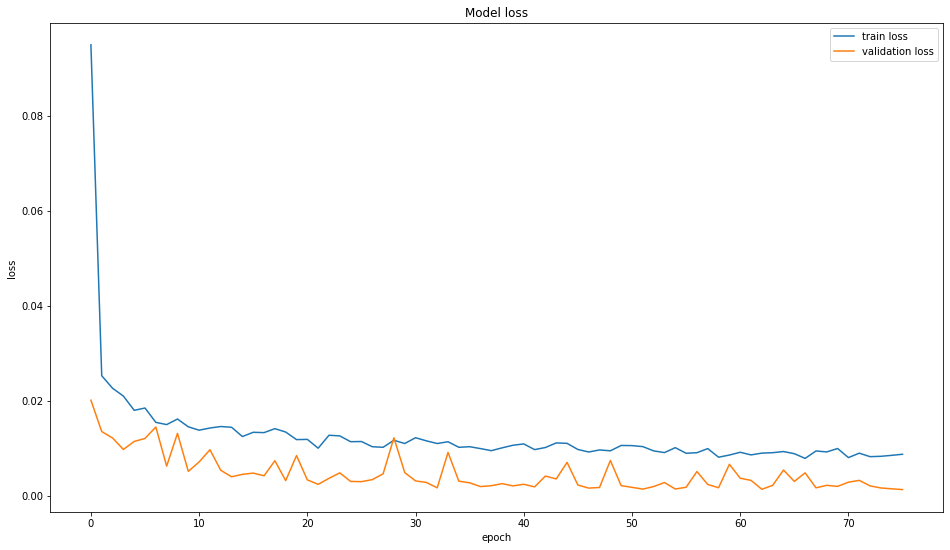

In [333]:
plt.figure(figsize=(16,9))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train loss', 'validation loss'])
plt.show()

In [334]:
#model.evaluate(X_train_shape_val,y_train_val)

In [335]:
np.argmin(history.history['val_loss'])

75

In [336]:
df1_train_last14=df2_train.iloc[-hops:]
df1_test_full=df2_test.set_index('index')


In [337]:
df1_train_last14

,lesieur,crude_oil,soja,colza,palm_oil,exchange_rate,sunflower_oil
2285,10.436100,46.780,29.44,698.5,680.20,9.55690,136274.176955
2286,10.442150,45.900,29.10,698.5,682.50,9.54000,136338.477366
2287,10.448200,41.280,28.48,698.5,669.00,9.49350,136402.777778
2288,10.454250,31.130,27.31,698.5,647.00,9.41050,136467.078189
2289,10.460300,34.360,27.74,698.5,644.70,9.47200,136531.378601
2290,10.466350,32.980,27.30,698.5,631.40,9.50200,136595.679012
2291,10.472400,31.500,26.15,698.5,606.70,9.54700,136659.979424
2292,10.478450,31.730,26.11,698.5,619.70,9.58800,136724.279835
2293,10.484500,30.215,25.55,698.5,610.05,9.56775,136788.580247
2294,10.606006,28.700,24.99,698.5,600.40,9.54750,136852.880658


In [338]:
full_df=pd.concat((df1_train_last14,df1_test_full),axis=0)
full_df.shape

(598, 7)

In [339]:
full_df

,lesieur,crude_oil,soja,colza,palm_oil,exchange_rate,sunflower_oil
2285,10.436100,46.78,29.44,698.5,680.2,9.5569,136274.176955
2286,10.442150,45.90,29.10,698.5,682.5,9.5400,136338.477366
2287,10.448200,41.28,28.48,698.5,669.0,9.4935,136402.777778
2288,10.454250,31.13,27.31,698.5,647.0,9.4105,136467.078189
2289,10.460300,34.36,27.74,698.5,644.7,9.4720,136531.378601
...,...,...,...,...,...,...,...
2878,17.136406,102.56,80.21,698.5,1009.0,9.2665,185000.000000
2879,17.136500,102.75,80.81,698.5,1009.0,9.2665,185000.000000
2880,17.136333,103.79,81.50,698.5,1009.0,9.2665,185000.000000
2881,17.136167,102.07,83.26,698.5,1009.0,9.2665,185000.000000


In [340]:
full_df=sc.transform(full_df)
full_df.shape

(598, 7)

In [341]:
full_df

array([[-1.41869724, -0.97493558, -0.8341673 , ...,  1.99465884,
         0.56577758,  2.71124649],
       [-1.41452303, -1.01416267, -0.8757185 , ...,  2.02470135,
         0.5380915 ,  2.71836434],
       [-1.41034883, -1.22010486, -0.95148835, ...,  1.84836485,
         0.46191383,  2.7254822 ],
       ...,
       [ 3.20413217,  1.56635539,  5.52805563, ...,  6.28943221,
         0.09003574,  8.10504558],
       [ 3.20401717,  1.48968427,  5.74314422, ...,  6.28943221,
         0.09003574,  8.10504558],
       [ 3.20390218,  1.48968427,  5.74314422, ...,  6.28943221,
         0.09003574,  8.10504558]])

In [342]:
hops=15
no_recors=597
no_cols=7
X_train_shape_pred=[]
for i in range(hops,598):
  X_train_shape_pred.append(full_df[i-hops:i])
X_train_shape_pred=np.array(X_train_shape_pred)
X_train_shape_pred.shape


(583, 15, 7)

In [343]:
ytest=model.predict(X_train_shape_pred)

In [344]:
y_final_pred=sc2.inverse_transform(ytest)
y_final_pred

array([[10.587461 ],
       [10.564865 ],
       [10.533919 ],
       [10.5034685],
       [10.488014 ],
       [10.497305 ],
       [10.526857 ],
       [10.573094 ],
       [10.614638 ],
       [10.64497  ],
       [10.655877 ],
       [10.643493 ],
       [10.613646 ],
       [10.594618 ],
       [10.59378  ],
       [10.609461 ],
       [10.635628 ],
       [10.657918 ],
       [10.671653 ],
       [10.678025 ],
       [10.758322 ],
       [10.750926 ],
       [10.706294 ],
       [10.670902 ],
       [10.654636 ],
       [10.659787 ],
       [10.665716 ],
       [10.657685 ],
       [10.634867 ],
       [10.611187 ],
       [10.59263  ],
       [10.572108 ],
       [10.554112 ],
       [10.534925 ],
       [10.5103245],
       [10.483716 ],
       [10.470797 ],
       [10.4721985],
       [10.482838 ],
       [10.495314 ],
       [10.505058 ],
       [10.519571 ],
       [10.539438 ],
       [10.564767 ],
       [10.542024 ],
       [10.511393 ],
       [10.506352 ],
       [10.53

In [345]:
final_open_pred=pd.DataFrame(y_final_pred)
final_open_pred.columns=['final_lesieur_pred']
final_open_pred

,final_lesieur_pred
0,10.587461
1,10.564865
2,10.533919
3,10.503469
4,10.488014
...,...
578,17.154245
579,17.184586
580,17.174885
581,17.146235


In [346]:
df2_date_test=df2_date.iloc[2300:]
df2_date_test.reset_index(inplace=True)
df2_date_test

,index,Date
0,2300,2020-03-24
1,2301,2020-03-25
2,2302,2020-03-26
3,2303,2020-03-27
4,2304,2020-03-30
...,...,...
578,2878,2022-04-19
579,2879,2022-04-20
580,2880,2022-04-21
581,2881,2022-04-22


In [347]:
fully_final=pd.concat((df2_date_test,final_open_pred,df2_test),axis=1)
fully_final=fully_final[['Date','lesieur','final_lesieur_pred']]
fully_final=fully_final.set_index('Date')

In [348]:
fully_final.head(50)

,lesieur,final_lesieur_pred
Date,,
2020-03-24,10.460500,10.587461
2020-03-25,10.412000,10.564865
2020-03-26,10.363500,10.533919
2020-03-27,10.403667,10.503469
2020-03-30,10.443833,10.488014
2020-03-31,10.484000,10.497305
2020-04-01,10.524669,10.526857
2020-04-02,10.565337,10.573094
2020-04-03,10.606006,10.614638


In [349]:
rmse = np.sqrt(np.mean(((fully_final['final_lesieur_pred'] - fully_final['lesieur']) ** 2)))
rmse

0.23760565941820005

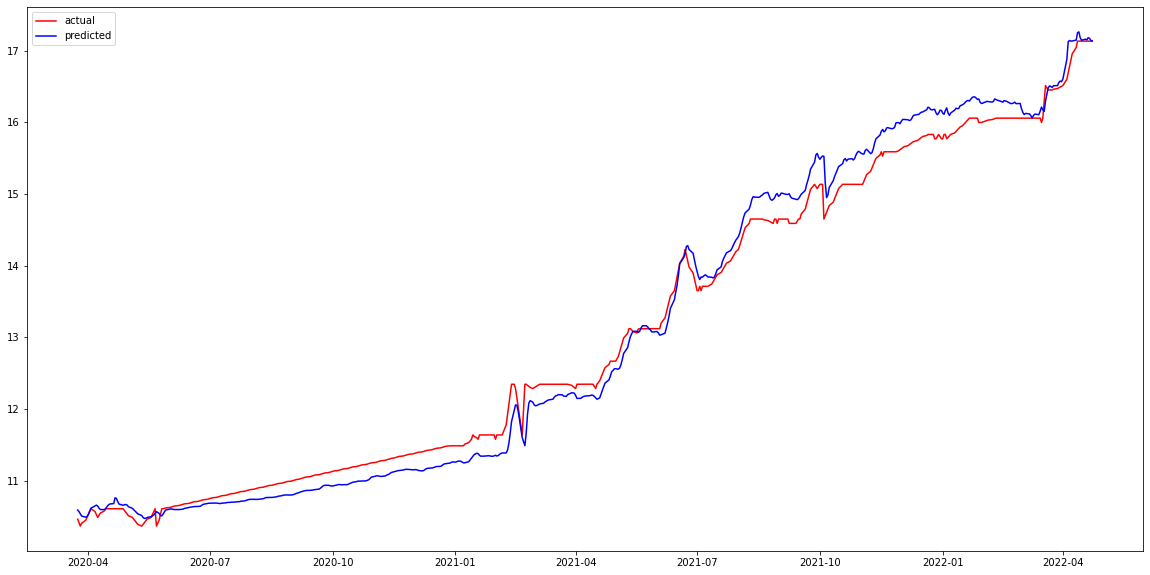

In [350]:
plt.figure(figsize=(20,10))

plt.plot(fully_final['lesieur'],label='actual',color='red')
plt.plot(fully_final['final_lesieur_pred'],label='predicted',color='blue')
plt.legend()


In [351]:
#fully_final.to_excel('essai.xlsx')

In [352]:
df2_date_test

,index,Date
0,2300,2020-03-24
1,2301,2020-03-25
2,2302,2020-03-26
3,2303,2020-03-27
4,2304,2020-03-30
...,...,...
578,2878,2022-04-19
579,2879,2022-04-20
580,2880,2022-04-21
581,2881,2022-04-22
